In [ ]:
#Ket noi drive
from google.colab import drive
drive.mount('/content/gdrive')

ValueError: mount failed

In [ ]:
#Them thu vien
!pip install squarify
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer



In [ ]:
#Nhap data AdventureWorks sau khi lam sach
data = pd.read_excel('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/AdventureWorkscleaned-version-1.xlsb.xlsx')
data.head(10)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount
0,SO49171,13865,20190101,1,2181.5625,2181.5625
1,SO49172,13885,20190101,1,2443.3500,2443.3500
2,SO49176,27054,20190101,1,2071.4196,2071.4196
3,SO49177,27064,20190101,1,2071.4196,2071.4196
4,SO49178,14342,20190101,1,1000.4375,1000.4375
5,SO49179,14365,20190101,1,1000.4375,1000.4375
6,SO49188,26815,20190102,1,2049.0982,2049.0982
7,SO49189,15525,20190102,1,782.9900,782.9900
8,SO49211,27020,20190104,1,2071.4196,2071.4196
9,SO49212,14337,20190104,1,1000.4375,1000.4375


In [ ]:
#So dong du lieu cua tung bien
data.count()

SalesOrder        10030
CustomerKey       10030
OrderDateKey      10030
Order Quantity    10030
Unit Price        10030
Sales Amount      10030
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalesOrder      10030 non-null  object 
 1   CustomerKey     10030 non-null  int64  
 2   OrderDateKey    10030 non-null  int64  
 3   Order Quantity  10030 non-null  int64  
 4   Unit Price      10030 non-null  float64
 5   Sales Amount    10030 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 470.3+ KB


Tính RFM

In [ ]:
# Tinh RFM cho tung khach hang
data['OrderDateKey'] = pd.to_datetime(data['OrderDateKey'], format='%Y%m%d')
import datetime
current_date = max(data['OrderDateKey']) + datetime.timedelta(days=1)
data_RFMcal = data.groupby(['CustomerKey']).agg(
    {'OrderDateKey': lambda x: (current_date - x.max()).days,
     'SalesOrder': 'count',
     'Sales Amount': 'sum'
    }
)
data_RFMcal = data_RFMcal.round(6)
# Doi ten cot
data_RFMcal.rename(columns={'OrderDateKey':'Recency', 'SalesOrder':'Frequency', 'Sales Amount':'Monetary'},inplace=True)
data_RFMcal.head()

,Recency,Frequency,Monetary
CustomerKey,,,
11012,137,3,74.98
11013,109,2,38.98
11014,92,6,138.45
11015,194,3,2500.97
11016,172,3,2332.28


In [ ]:
#Tai file data_RFMcal
data_RFMcal.to_csv('data_RFMcal.csv')
from google.colab import files
files.download('data_RFMcal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA

In [ ]:
data_RFMcal.describe()

,Recency,Frequency,Monetary
count,4024.000000,4024.000000,4024.000000
mean,103.183151,2.492545,785.680543
std,70.166490,1.161759,997.525723
min,1.000000,1.000000,2.290000
25%,48.000000,2.000000,39.980000
50%,94.000000,2.000000,118.960000
75%,149.000000,3.000000,1700.990000
max,365.000000,8.000000,4844.800000


Tính điểm RFM

In [ ]:
# Nhap file data_RFMcal
rfm_score = pd.read_csv("/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal.csv")

In [ ]:
rfm_score.head(5)

,CustomerKey,Recency,Frequency,Monetary
0,11012,137,3,74.98
1,11013,109,2,38.98
2,11014,92,6,138.45
3,11015,194,3,2500.97
4,11016,172,3,2332.28


In [ ]:
# Tinh diem cho tung gia tri R, F, M
rfm_score['RecencyScore']=pd.qcut(rfm_score['Recency'],5,labels=[5,4,3,2,1])
rfm_score['FrequencyScore']=pd.qcut(rfm_score['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm_score['MonetaryScore']=pd.qcut(rfm_score['Monetary'],5,labels=[1,2,3,4,5])
rfm_score.head()

,CustomerKey,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,11012,137,3,74.98,2,3,3
1,11013,109,2,38.98,3,2,2
2,11014,92,6,138.45,3,5,3
3,11015,194,3,2500.97,1,3,5
4,11016,172,3,2332.28,1,3,5


In [ ]:
# Tinh diem tong the 3 gia tri RFM
rfm_score['RFM_score']=rfm_score['RecencyScore'].astype(str)+rfm_score['FrequencyScore'].astype(str)+rfm_score['MonetaryScore'].astype(str)
rfm_score.head()

,CustomerKey,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_score
0,11012,137,3,74.98,2,3,3,233
1,11013,109,2,38.98,3,2,2,322
2,11014,92,6,138.45,3,5,3,353
3,11015,194,3,2500.97,1,3,5,135
4,11016,172,3,2332.28,1,3,5,135


In [ ]:
#Tải file rfm_score
#rfm_score.to_csv('rfm_score.csv')
#from google.colab import files
#files.download('rfm_score.csv')



```
# This is formatted as code
```

Data transformation


In [ ]:
# Nhap file data_RFMcal
data_pretrans=pd.read_csv("/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal (3).csv")
data_pretrans.head()

FileNotFoundError: ignored

<ipython-input-15-ec3da696fd44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_RFMcal['Recency'], ax = ax[0])
<ipython-input-15-ec3da696fd44>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_RFMcal['Frequency'], ax = ax[1])
<ipython-input-15-ec3da696fd44>:5: UserWarning: 

`distplot`

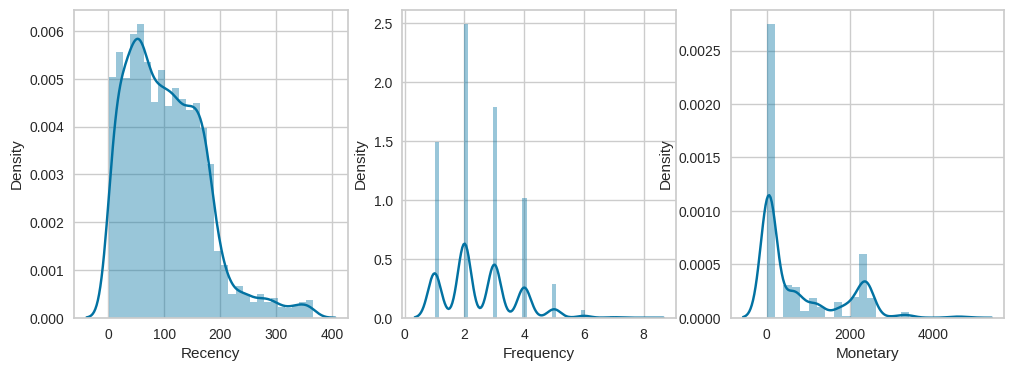

In [ ]:
# Kiem tra phan phoi du lieu
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(data_RFMcal['Recency'], ax = ax[0])
sns.distplot(data_RFMcal['Frequency'], ax = ax[1])
sns.distplot(data_RFMcal['Monetary'], ax = ax[2])
plt.show()

In [ ]:
# Ham thu nghiem 4 phuong phap transform: log, square root, box-cox va cube root
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(data_pretrans[x], ax=ax[0,0])
    sns.distplot(np.log(data_pretrans[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(data_pretrans[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(data_pretrans[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(data_pretrans[x].skew().round(2))
    print(np.log(data_pretrans[x]).skew().round(2))
    print(np.sqrt(data_pretrans[x]).skew().round(2))
    print(pd.Series(stats.boxcox(data_pretrans[x])[0]).skew().round(2))

NameError: ignored

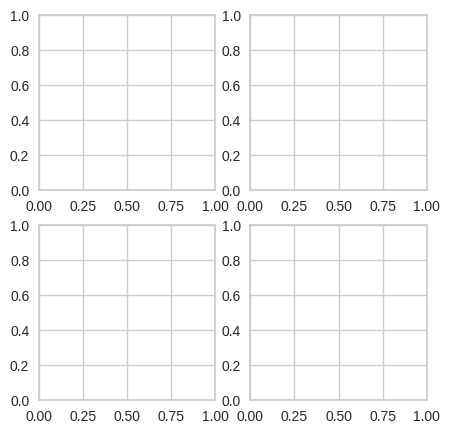

In [ ]:
analyze_skewness('Recency')

NameError: ignored

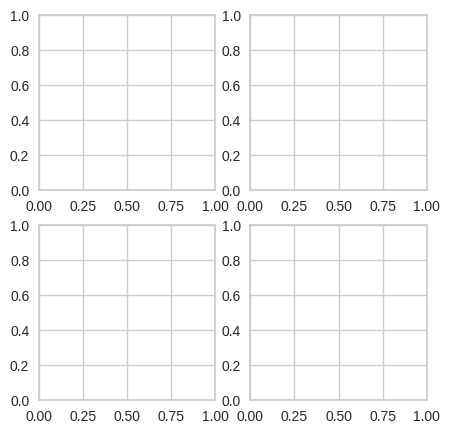

In [ ]:
analyze_skewness('Frequency')

<ipython-input-10-de5af0e66d17>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_pretrans[x], ax=ax[0,0])
<ipython-input-10-de5af0e66d17>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_pretrans[x]), ax=ax[0,1])
<ipython-input-10-de5af0e66d17>:7: UserWarning: 

`distplot` is a 

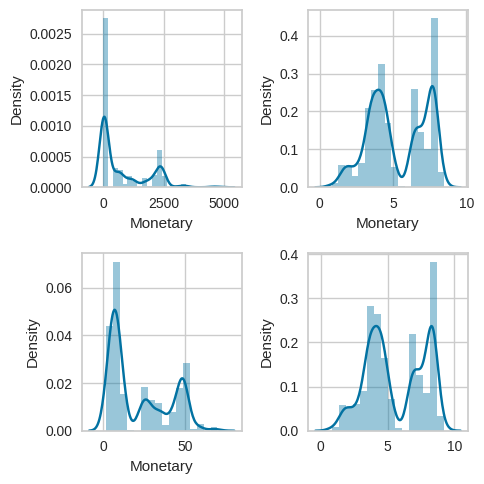

1.13
-0.06
0.62
-0.02


In [ ]:
analyze_skewness('Monetary')

In [ ]:
# Nhap file data_RFMcal
data_transformed = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal.csv')
data_transformed.head()

,CustomerKey,Recency,Frequency,Monetary
0,11012,137,3,74.98
1,11013,109,2,38.98
2,11014,92,6,138.45
3,11015,194,3,2500.97
4,11016,172,3,2332.28


In [ ]:
# Chuan hoa
data_transformed['Recency'] = pd.Series(np.sqrt(data_transformed['Recency'])).values
data_transformed['Frequency'] = stats.boxcox(data_transformed['Frequency'])[0]
data_transformed['Monetary'] = stats.boxcox(data_transformed['Monetary'])[0]
data_transformed.head(10)

,CustomerKey,Recency,Frequency,Monetary
0,11012,11.704700,1.298562,4.504572
1,11013,10.440307,0.769479,3.797343
2,11014,9.591663,2.364176,5.175862
3,11015,13.928388,1.298562,8.454334
4,11016,13.114877,1.298562,8.373020
5,11021,13.747727,1.298562,8.392654
6,11022,13.856406,0.769479,8.368020
7,11023,12.806248,1.714436,4.981006
8,11024,2.236068,2.364176,4.197722
9,11036,13.784049,0.769479,8.384291


In [ ]:
#Tai file data_transformed
data_transformed.to_csv('data_transformed.csv')
from google.colab import files
files.download('data_transformed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data scaling by z-score

In [ ]:
from scipy import stats
data_scaled = data_transformed.copy()
columns_to_exclude = ['CustomerKey']
data_scaled[data_transformed.columns.difference(columns_to_exclude)] = data_scaled[data_scaled.columns.difference(columns_to_exclude)].apply(stats.zscore)
data_scaled.head()

,CustomerKey,Recency,Frequency,Monetary
0,11012,0.611496,0.567390,-0.510893
1,11013,0.262259,-0.282735,-0.837864
2,11014,0.027856,2.279605,-0.200537
3,11015,1.225699,0.567390,1.315189
4,11016,1.001000,0.567390,1.277595


In [ ]:
#Tai file data_scaled
data_scaled.to_csv('data_scaled.csv')
from google.colab import files
files.download('data_scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[8519.22760269514, 6291.379436324091, 5121.154439577553, 4249.267531984605, 3538.283176646112, 2936.892669678251, 2583.258096505292, 2318.3911699087666, 2073.452739925985]


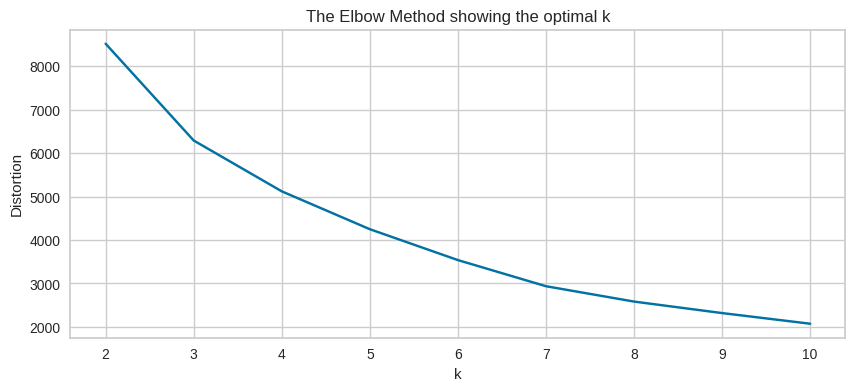

In [ ]:
# Tim so cum k bang elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_without_customerkey = data_scaled.drop('CustomerKey', axis=1)
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,init='random', random_state=42 )
    kmeans.fit(data_without_customerkey)
    ssd.append(kmeans.inertia_)
print(ssd)
# Plot
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# Tạo dữ liệu mẫu
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]
for num_clusters in range_n_clusters:
    kmeansmodel = KMeans(n_clusters=num_clusters,init='random',random_state=42)
    kmeansmodel.fit(data_without_customerkey)
    labels = kmeansmodel.labels_
    silhouette_avg = silhouette_score(data_without_customerkey, labels)
    print(f"Chỉ số silhouette trung bình của {num_clusters}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 2: 0.3130339575917953


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 3: 0.3216935211446969


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 4: 0.31308872676194055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 5: 0.3365939065979124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 6: 0.3428788453577058


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 7: 0.37015290712826665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 8: 0.3627360487734317


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 9: 0.3659756872598933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 10: 0.3664125743093621


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 11: 0.35936546943114084


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 12: 0.35196111554152393


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# Tạo dữ liệu mẫu
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]
for num_clusters in range_n_clusters:
    kmeansmodel = KMeans(n_clusters=num_clusters,init='random',random_state=42)
    kmeansmodel.fit(data_without_customerkey)
    labels = kmeansmodel.fit_predict(data_without_customerkey)
    silhouette_avg = silhouette_score(data_without_customerkey, labels)
    print(f"Chỉ số silhouette trung bình của {num_clusters}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 2: 0.3130339575917953


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 3: 0.3216935211446969


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 4: 0.31308872676194055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 5: 0.3365939065979124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 6: 0.3428788453577058


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 7: 0.37015290712826665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 8: 0.3627360487734317


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 9: 0.3659756872598933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 10: 0.3664125743093621


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 11: 0.35936546943114084


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chỉ số silhouette trung bình của 12: 0.35196111554152393


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[8519.612356805148, 6291.3791542778545, 5121.032295033938, 4248.740336579262, 3527.630253816611, 2936.8510327054237, 2583.1707078841255, 2346.1242785037675, 2074.285660483935]


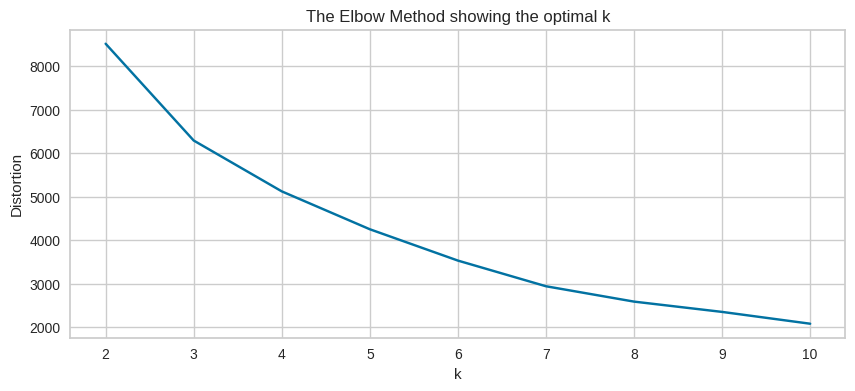

In [ ]:
# Tim so cum k bang elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_without_customerkey = data_scaled.drop('CustomerKey', axis=1)
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeanplus = KMeans(n_clusters=num_clusters,init='k-means++',random_state=42)
    kmeanplus.fit(data_without_customerkey)
    ssd.append(kmeanplus.inertia_)
print(ssd)
# Plot
plt.figure(figsize=(10, 4))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

silhouette_scores = []

# Tạo dữ liệu mẫu
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]
for num_clusters in range_n_clusters:
    kmedoids_model = KMedoids(n_clusters=num_clusters,random_state=42)
    kmedoids_model.fit(data_without_customerkey)
    labels = kmedoids_model.labels_
    silhouette_avg = silhouette_score(data_without_customerkey, labels)
    print(f"Chỉ số silhouette trung bình của {num_clusters}: {silhouette_avg}")


Chỉ số silhouette trung bình của 2: 0.2946452346728932
Chỉ số silhouette trung bình của 3: 0.2647791284472881
Chỉ số silhouette trung bình của 4: 0.29548426160999847
Chỉ số silhouette trung bình của 5: 0.2961108723498277
Chỉ số silhouette trung bình của 6: 0.3113221730450347
Chỉ số silhouette trung bình của 7: 0.2833289839207788
Chỉ số silhouette trung bình của 8: 0.32445718685862646
Chỉ số silhouette trung bình của 9: 0.3254780027062567
Chỉ số silhouette trung bình của 10: 0.30555279824648524
Chỉ số silhouette trung bình của 11: 0.2839641098125339
Chỉ số silhouette trung bình của 12: 0.3016469339066787


In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for k in [4, 5, 6, 7, 8]:

    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_without_customerkey)
    visualizer.ax.set_title("")


visualizer.show()

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

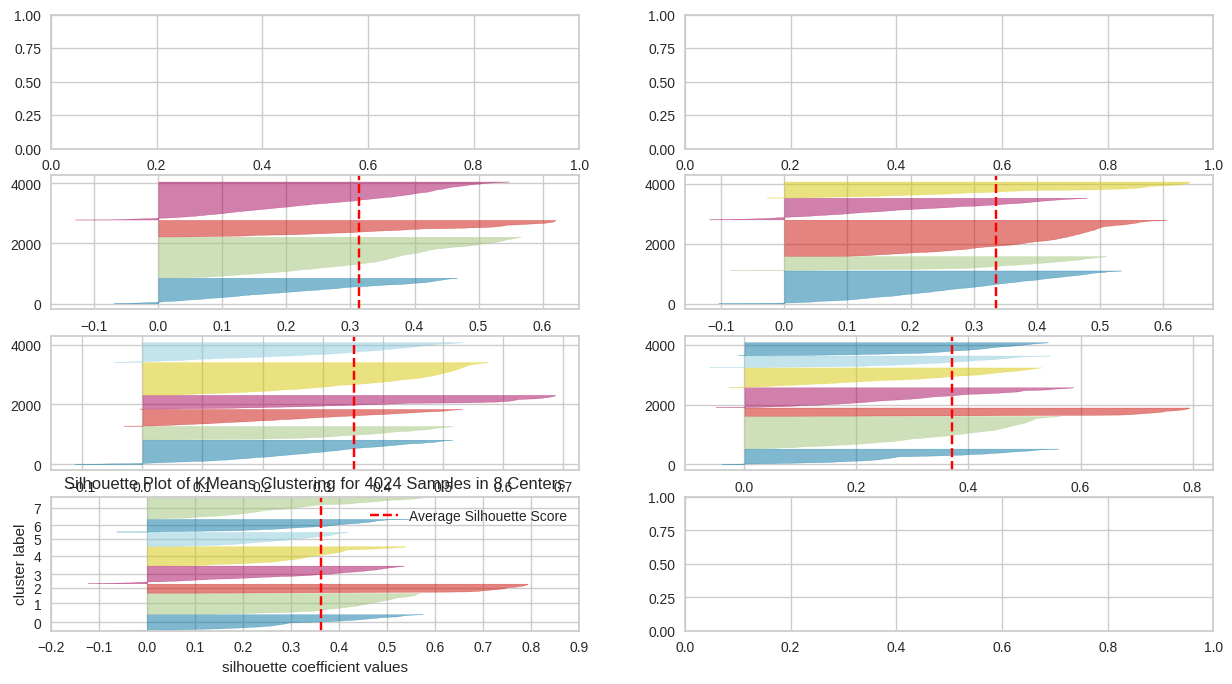

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4024 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for k in [4, 5, 6, 7, 8]:

    kmpl = KMeans(n_clusters=k, init='k-means++', random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(kmpl, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_without_customerkey)

visualizer.show()

In [ ]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.6 MB/s eta 0:00:00


IndexError: ignored

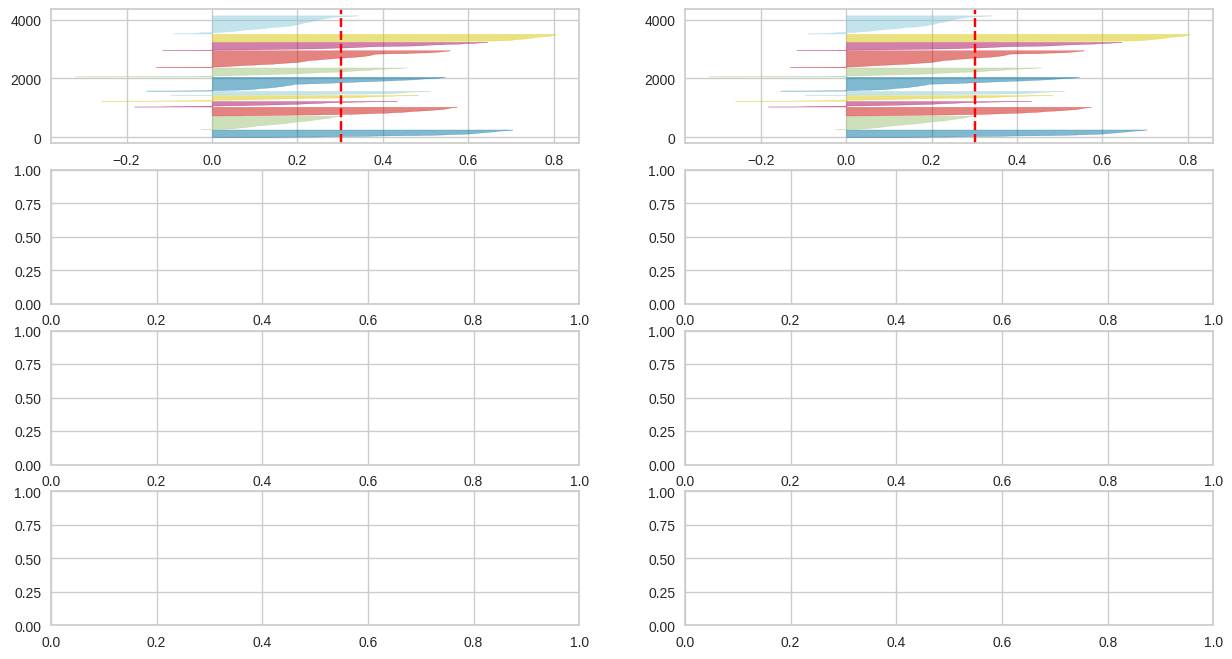

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for k in [4, 5, 6, 7, 8]:

    kmm = KMedoids(n_clusters=num_clusters,random_state=42)
    kmm.fit(data_without_customerkey)
    labels = kmm.labels_
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(kmm, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_without_customerkey)

visualizer.show()

In [ ]:
#Tinh RFM cho tung cum (R', F', M')
df = pd.read_csv('/content/drive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_label.csv')
rfm_mean = df.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean','CustomerKey': 'size'})
rfm_mean = rfm_mean.rename(columns={
    'Recency': 'R\'',
    'Frequency': 'F\'',
    'Monetary': 'M\'',
    'CustomerKey': 'Nu. of Customers'})
rfm_mean.head(6)

,R',F',M',Nu. of Customers
Cluster,,,,
0,8.175746,0.882567,3.839958,822
1,3.812563,0.949546,4.307308,473
2,6.306513,1.215594,7.921418,665
3,15.511878,0.494924,7.851617,409
4,11.096770,1.176369,7.763393,664
5,11.867591,0.845559,3.779369,991


In [ ]:
#Tai file rfm_mean
rfm_mean.to_csv('rfm_mean.csv')
from google.colab import files
files.download('rfm_mean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#EDA
data_eda=pd.read_excel('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/AdventureWorkscleaned-version-1.xlsb.xlsx')
data_eda.head(10)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount
0,SO49171,13865,20190101,1,2181.5625,2181.5625
1,SO49172,13885,20190101,1,2443.3500,2443.3500
2,SO49176,27054,20190101,1,2071.4196,2071.4196
3,SO49177,27064,20190101,1,2071.4196,2071.4196
4,SO49178,14342,20190101,1,1000.4375,1000.4375
5,SO49179,14365,20190101,1,1000.4375,1000.4375
6,SO49188,26815,20190102,1,2049.0982,2049.0982
7,SO49189,15525,20190102,1,782.9900,782.9900
8,SO49211,27020,20190104,1,2071.4196,2071.4196
9,SO49212,14337,20190104,1,1000.4375,1000.4375


In [ ]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalesOrder      10030 non-null  object 
 1   CustomerKey     10030 non-null  int64  
 2   OrderDateKey    10030 non-null  int64  
 3   Order Quantity  10030 non-null  int64  
 4   Unit Price      10030 non-null  float64
 5   Sales Amount    10030 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 470.3+ KB


In [ ]:
data_eda_drop=data_eda.drop(['CustomerKey','OrderDateKey','SalesOrder'], axis='columns')


data_eda_drop.describe()

,Order Quantity,Unit Price,Sales Amount
count,10030.0,10030.000000,10030.000000
mean,1.0,315.212214,315.212214
std,0.0,683.138497,683.138497
min,1.0,2.290000,2.290000
25%,1.0,4.990000,4.990000
50%,1.0,28.990000,28.990000
75%,1.0,54.990000,54.990000
max,1.0,2443.350000,2443.350000


In [ ]:
data_eda_drop.mode()

,Order Quantity,Unit Price,Sales Amount
0,1,4.99,4.99


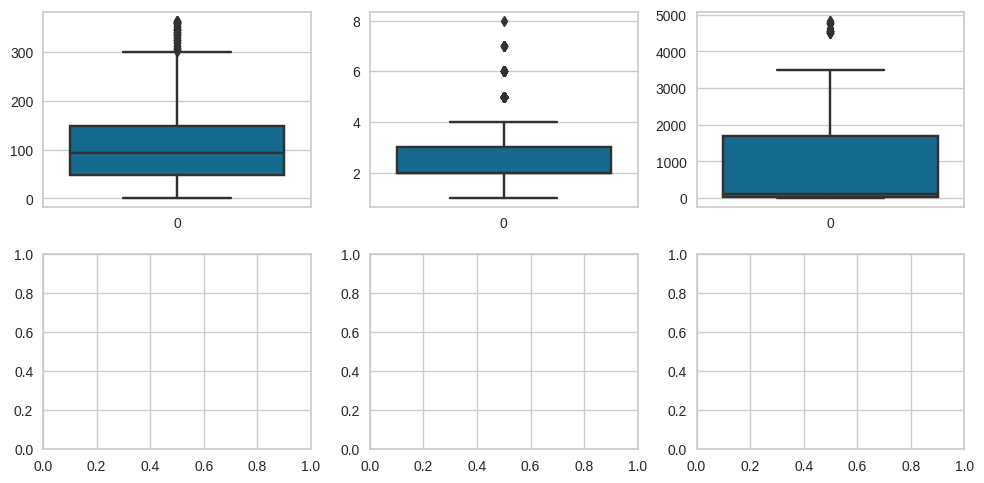

In [ ]:
-

In [ ]:
data_eda_corr=data_eda_drop.corr()
print(data_eda_corr)

            Recency  Frequency  Monetary
Recency    1.000000  -0.231176  0.124417
Frequency -0.231176   1.000000  0.193379
Monetary   0.124417   0.193379  1.000000


<Axes: xlabel='Frequency', ylabel='Recency'>

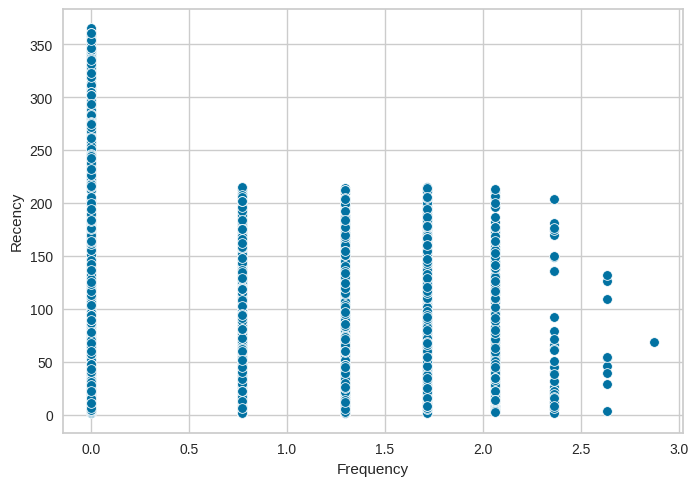

In [ ]:
sns.scatterplot(y=data_eda['Recency'],x=df['Frequency'])


<Axes: xlabel='Monetary', ylabel='Recency'>

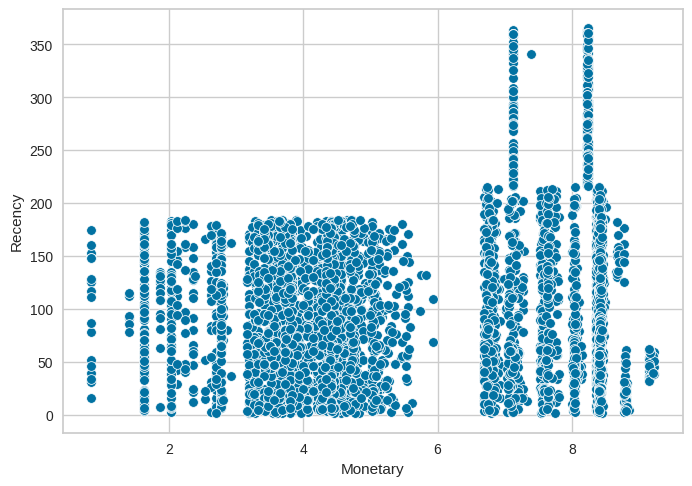

In [ ]:
#sns.scatterplot(y=data_eda['Recency'],x=df['Monetary'])????


<Axes: >

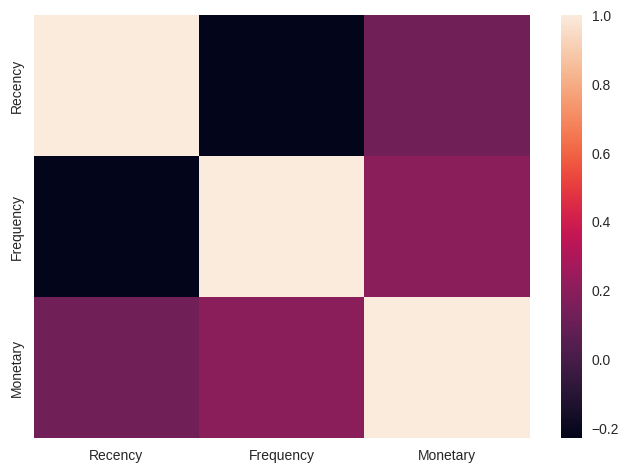

In [ ]:
import seaborn as sns
sns.heatmap(data_eda_corr)

In [ ]:
#Nhap 2 bản data AdventureWorks sau khi transformed và scaled
data = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_scaled.csv')
data_RFM=pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal.csv')
data.head(10)

In [ ]:
# Tạo df mới không có cột CustomerKey để chạy K-means
data_without_customerkey = data.drop(['CustomerKey'], axis=1)
data_without_customerkey.head()

In [ ]:
# Phan cum bang Kmeans voi k=7
from sklearn.cluster import KMeans
model_KMeans = KMeans(n_clusters = 7,init='random', max_iter=500)
model_KMeans.fit(data_without_customerkey)

In [ ]:
# Them cot nhan cum sau khi phan cum
Kmeans_clustering_scaled=data.copy()
Kmeans_clustering_scaled['Cluster'] = model_KMeans.labels_
Kmeans_clustering_scaled.head()

In [ ]:
Kmeans_clustering_scaled=pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmeans_clustering_scaled.csv')
data_RFM['Cluster']=Kmeans_clustering_scaled.Cluster
data_RFM.head()

In [ ]:
# Tính kết quả tổng R,F,M từng cụm
df = data_RFM
rfm_sum  = df.groupby('Cluster').agg({'Recency': 'sum', 'Frequency': 'sum', 'Monetary': 'sum','CustomerKey': 'size'})
rfm_sum = rfm_sum.rename(columns={
    'Recency': 'Sum R',
    'Frequency': 'Sum F',
    'Monetary': 'Sum M',
    'CustomerKey': 'Nu. of Customers'})
rfm_sum.head(8)
#rfm_sum.to_csv('rfm_sum.csv')
#from google.colab import files
#files.download('rfm_sum.csv')

In [ ]:
# Tính Mean R, Mean F, Mean M
df = data_RFM
rfm_mean = df.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean','CustomerKey': 'size'})
calculate_percentage = lambda x: (x.count() / df['CustomerKey'].count()) * 100
rfm_mean['CustomerKey'] = df.groupby('Cluster')['CustomerKey'].agg(calculate_percentage)
rfm_mean = rfm_mean.rename(columns={
    'Recency': 'Mean R',
    'Frequency': 'Mean F',
    'Monetary': 'Mean M',
    'CustomerKey': 'Percentage'
})
rfm_mean['Mean R'].round(6)
rfm_mean['Mean F'].round(6)
rfm_mean['Mean M'].round(6)
rfm_mean['Percentage'].round(6)
rfm_mean.head(8)
#rfm_mean.to_csv('rfm_mean.csv')
#from google.colab import files
#files.download('rfm_mean.csv')

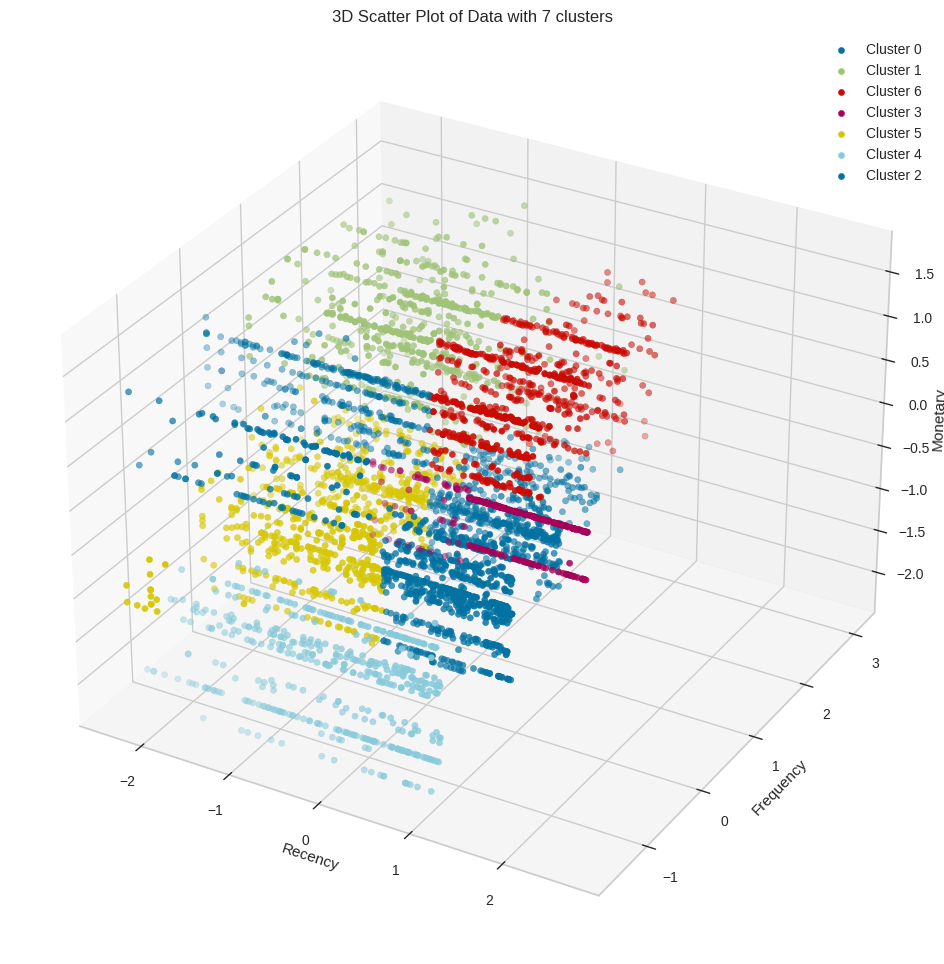

In [ ]:
# Vẽ biểu đồ kiểm tra độ phân tán các cụm
from mpl_toolkits.mplot3d import Axes3D
Kmeans_clustering_scaled = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmeans_clustering_scaled.csv')

# Biểu đồ không gian 3 chiều
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm cho mỗi cụm
for cluster in Kmeans_clustering_scaled['Cluster'].unique():
    cluster_data = Kmeans_clustering_scaled[Kmeans_clustering_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Data with 7 clusters')
ax.legend()

plt.show()

In [ ]:
data_RFM_without_customerkey =data_RFM.drop('CustomerKey', axis=1)
def split_dataframe_by_column_value(df, column_name):

    # Group by giá trị của cột
    grouped = df.groupby(column_name)

    # Tạo một dictionary để lưu trữ các DataFrame nhỏ dựa trên giá trị của cột
    subframes = {}

    # Lặp qua từng giá trị và tạo DataFrame con cho mỗi giá trị
    for value, group in grouped:
        subframes[value] = group.copy()

    return subframes


In [ ]:
result=split_dataframe_by_column_value(data_RFM_without_customerkey,'Cluster')
result[0].describe()

In [ ]:
result[1].describe()

In [ ]:
## K-MEANS++

In [ ]:
#Nhap 2 bản data AdventureWorks sau khi transformed và scaled
data = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_scaled.csv')
data_RFM=pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal.csv')
data.head(10)

In [ ]:
# Tạo df mới không có cột CustomerKey để chạy K-means++
data_without_customerkey = data.drop(['CustomerKey'], axis=1)
data_without_customerkey.head()

In [ ]:
#Phan cum bang Kmeans++
from sklearn.cluster import KMeans
import numpy as np

# Sử dụng hàm KMeans từ scikit-learn
kmeansplus = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeansplus.fit(data_without_customerkey)

In [ ]:
# Them cot nhan cum sau khi phan cum
Kmeansplus_clustering_scaled=data.copy()
Kmeansplus_clustering_scaled['Cluster'] = kmeansplus.labels_
Kmeansplus_clustering_scaled.head()

In [ ]:
data_RFM['Cluster']=Kmeansplus_clustering_scaled.Cluster
data_RFM.head()

In [ ]:
df = data_RFM
rfm_sum  = df.groupby('Cluster').agg({'Recency': 'sum', 'Frequency': 'sum', 'Monetary': 'sum','CustomerKey': 'size'})
rfm_sum = rfm_sum.rename(columns={
    'Recency': 'Sum R',
    'Frequency': 'Sum F',
    'Monetary': 'Sum M',
    'CustomerKey': 'Nu. of Customers'})
rfm_sum.head(8)

In [ ]:
df = data_RFM
rfm_mean = df.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean','CustomerKey': 'size'})
calculate_percentage = lambda x: (x.count() / df['CustomerKey'].count()) * 100
rfm_mean['CustomerKey'] = df.groupby('Cluster')['CustomerKey'].agg(calculate_percentage)
rfm_mean = rfm_mean.rename(columns={
    'Recency': 'Mean R',
    'Frequency': 'Mean F',
    'Monetary': 'Mean M',
    'CustomerKey': 'Percentage'
})
rfm_mean.head(8)

In [ ]:
# Vẽ biểu đồ kiểm tra độ phân tán các cụm
from mpl_toolkits.mplot3d import Axes3D
Kmeansplus_clustering_scaled = Kmeansplus_clustering_scaled

# Biểu đồ không gian 3 chiều
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm cho mỗi cụm
for cluster in Kmeansplus_clustering_scaled['Cluster'].unique():
    cluster_data = Kmeansplus_clustering_scaled[Kmeansplus_clustering_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')5

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Data with 7 clusters')
ax.legend()

plt.show()

In [ ]:
data_RFM_without_customerkey =data_RFM.drop('CustomerKey', axis=1)

In [ ]:
def split_dataframe_by_column_value(df, column_name):

    # Group by giá trị của cột
    grouped = df.groupby(column_name)

    # Tạo một dictionary để lưu trữ các DataFrame nhỏ dựa trên giá trị của cột
    subframes = {}

    # Lặp qua từng giá trị và tạo DataFrame con cho mỗi giá trị
    for value, group in grouped:
        subframes[value] = group.copy()

    return subframes

In [ ]:
result=split_dataframe_by_column_value(data_RFM_without_customerkey,'Cluster')
result[0].describe()

In [ ]:
## KMEDOIDS

In [ ]:
pip install scikit-learn-extra
!pip install squarify
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_scaled.csv')

In [ ]:
from sklearn_extra.cluster import KMedoids

# Lấy tất cả các cột trừ cột "CustomerKey"
data = df.drop(columns=['CustomerKey'])

# Áp dụng thuật toán K-medoids với k=7
model_KMedoids = KMedoids(n_clusters=7, init = 'random', random_state = 42)
model_KMedoids.fit(data)


In [ ]:
# Gắn nhãn cho cụm bởi thuật toán K-medoids
Kmedoids_clustering_scaled = df.copy()
Kmedoids_clustering_scaled['Cluster'] = model_KMedoids.labels_
Kmedoids_clustering_scaled.head()


In [ ]:
# Tải file csv đã gắn nhãn
Kmedoids_clustering_scaled.to_csv('Kmedoids_clustering_scaled.csv')
from google.colab import files
files.download('Kmedoids_clustering_scaled.csv')

In [ ]:
# Vẽ biểu đồ kiểm tra độ phân tán các cụm
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmedoids_clustering_scaled.csv')

# Biểu đồ không gian 3 chiều
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm cho mỗi cụm
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Data with 7 clusters')
ax.legend()

plt.show()

In [ ]:
data_RFM = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/data_RFMcal.csv')
Kmedoids_clustering_scaled = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmedoids_clustering_scaled.csv')
data_RFM['Cluster']=Kmedoids_clustering_scaled.Cluster
data_RFM.head(10)

In [ ]:
# Tính kết quả tổng R,F,M từng cụm Kmedoids
df = data_RFM
rfm_sum_medoids  = df.groupby('Cluster').agg({'Recency': 'sum', 'Frequency': 'sum', 'Monetary': 'sum','CustomerKey': 'size'})
rfm_sum_medoids = rfm_sum_medoids.rename(columns={
    'Recency': 'Sum R',
    'Frequency': 'Sum F',
    'Monetary': 'Sum M',
    'CustomerKey': 'Nu. of Customers'})
rfm_sum_medoids.head(10)

In [ ]:
# Tính Mean R, Mean F, Mean M của kmedoids
df = data_RFM
rfm_mean_medoids = df.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean','CustomerKey': 'size'})
calculate_percentage = lambda x: (x.count() / df['CustomerKey'].count()) * 100
rfm_mean_medoids['CustomerKey'] = df.groupby('Cluster')['CustomerKey'].agg(calculate_percentage)
rfm_mean_medoids = rfm_mean_medoids.rename(columns={
    'Recency': 'Mean R',
    'Frequency': 'Mean F',
    'Monetary': 'Mean M',
    'CustomerKey': 'Percentage'
})
rfm_mean_medoids.head(6)

In [ ]:
data = data_RFM.drop('CustomerKey', axis=1)
def split_dataframe_by_column_value(df, column_name):

    # Group by giá trị của cột
    grouped = df.groupby(column_name)

    # Tạo một dictionary để lưu trữ các DataFrame nhỏ dựa trên giá trị của cột
    subframes = {}

    # Lặp qua từng giá trị và tạo DataFrame con cho mỗi giá trị
    for value, group in grouped:
        subframes[value] = group.copy()

    return subframes
result=split_dataframe_by_column_value(data,'Cluster')


In [ ]:
result[0].describe()

In [ ]:
## CLV

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib as plt


In [ ]:
# Ket noi drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
tx_data = pd.read_excel('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/AdventureWorkscleaned-version-1.xlsb.xlsx')

In [ ]:
#Check the shape (number of columns and rows) in the dataset
tx_data.shape

(10030, 6)

In [ ]:
#Find out missing values
tx_data.isnull().sum(axis=0)

SalesOrder        0
CustomerKey       0
OrderDateKey      0
Order Quantity    0
Unit Price        0
Sales Amount      0
dtype: int64

In [ ]:
tx_data['OrderDateKey'] = pd.to_datetime(tx_data['OrderDateKey'], format='%Y%m%d').dt.date

# Convert the date format while keeping only the date component
tx_data['OrderDateKey'] = pd.to_datetime(tx_data['OrderDateKey']).dt.date

# Remove rows with missing CustomerKey values
tx_data = tx_data[pd.notnull(tx_data['CustomerKey'])]

# Keep records with non-negative quantity
tx_data = tx_data[(tx_data['Order Quantity'] > 0)]

# Add a new column depicting total sales
tx_data['Total_Sales'] = tx_data['Order Quantity'] * tx_data['Unit Price']

# Select necessary columns
necessary_cols = ['CustomerKey', 'OrderDateKey', 'Total_Sales']
tx_data = tx_data[necessary_cols]

# Display the first few rows of the modified dataframe
tx_data.head()


,CustomerKey,OrderDateKey,Total_Sales
0,13865,2019-01-01,2181.5625
1,13885,2019-01-01,2443.3500
2,27054,2019-01-01,2071.4196
3,27064,2019-01-01,2071.4196
4,14342,2019-01-01,1000.4375


In [ ]:
#Print records pertaining unique Customer IDs
print(tx_data['CustomerKey'].nunique())

4024


In [ ]:
#Check the Last order date
last_order_date = tx_data['OrderDateKey'].max()
print(last_order_date)
print("--------------------------------------")
print(tx_data[(tx_data['CustomerKey']==14355)])

2019-12-31
--------------------------------------
      CustomerKey OrderDateKey  Total_Sales
33          14355   2019-01-15    1000.4375
5733        14355   2019-10-15     769.4900
5734        14355   2019-10-15      34.9900


In [ ]:
pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase)
#into summary data (a frequency, recency, age and monetary).

lf_tx_data = summary_data_from_transaction_data(tx_data, 'CustomerKey', 'OrderDateKey', monetary_value_col='Total_Sales', observation_period_end='2019-12-31')
lf_tx_data.reset_index().head()

,CustomerKey,frequency,recency,T,monetary_value
0,11012,0.0,0.0,136.0,0.00
1,11013,0.0,0.0,108.0,0.00
2,11014,1.0,38.0,129.0,99.47
3,11015,0.0,0.0,193.0,0.00
4,11016,0.0,0.0,171.0,0.00


count    4024.000000
mean        0.059642
std         0.236852
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 94.04 %


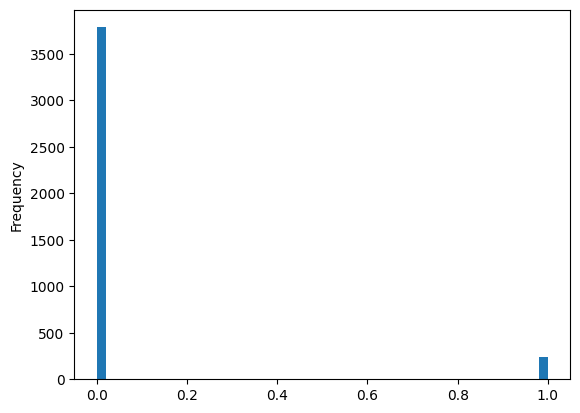

In [ ]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lf_tx_data['frequency'].plot(kind='hist', bins=50)
print(lf_tx_data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_tx_data['frequency'] == 0)/float(len(lf_tx_data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [ ]:
%%time
calibration_period_ends = '2019-09-22'

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(tx_data,
                                                   customer_id_col = 'CustomerKey',
                                                   datetime_col = 'OrderDateKey',
                                                   freq = 'D', #days
                                        calibration_period_end=calibration_period_ends,
                                        observation_period_end='2019-12-31' )


CPU times: user 908 ms, sys: 1.73 ms, total: 910 ms
Wall time: 2.05 s


In [ ]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import ModifiedBetaGeoFitter
bgf = ModifiedBetaGeoFitter(penalizer_coef=0.0005)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'], verbose=True)
print(bgf)

Optimization terminated successfully.
         Current function value: 0.167919
         Iterations: 57
         Function evaluations: 58
         Gradient evaluations: 58
<lifetimes.ModifiedBetaGeoFitter: fitted with 4024 subjects, a: 0.00, alpha: 916.44, b: 0.00, r: 0.53>


In [ ]:
# Predicted number of transactions for the holdout period
t = 90  # Adjust this based on your business context; e.g., 90 days
lf_tx_data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])

# Joining the predicted purchases with the holdout set
summary_cal_holdout = summary_cal_holdout.join(lf_tx_data[['predicted_purchases']], on='CustomerKey')

# Drop NaN values (customers not present in the training set)
summary_cal_holdout = summary_cal_holdout.dropna(subset=['predicted_purchases'])

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual vs Predicted purchases for holdout set
y_true = summary_cal_holdout['frequency_holdout']
y_pred = summary_cal_holdout['predicted_purchases']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.10781248746417739
Mean Squared Error (MSE): 0.059075603560909934
Root Mean Squared Error (RMSE): 0.2430547336731172


In [ ]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import matplotlib.pyplot as plt
import seaborn as sns


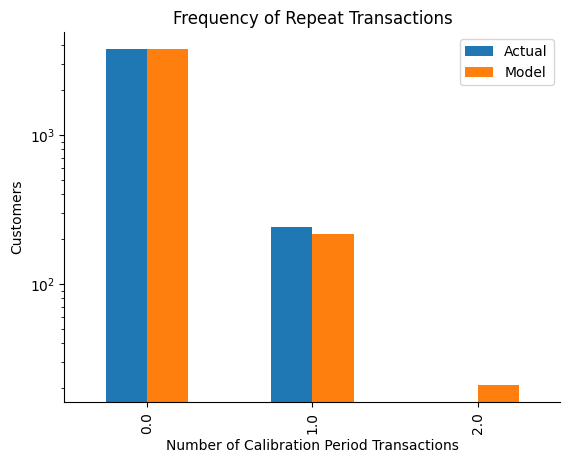

In [ ]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=3)
ax.set_yscale('log')
sns.despine();

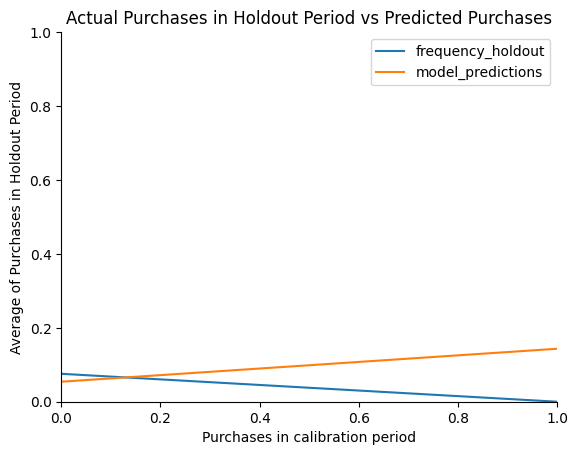

CPU times: user 373 ms, sys: 38.3 ms, total: 411 ms
Wall time: 556 ms


In [ ]:
%%time

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị đồ thị
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

# Đặt giới hạn cho trục x và trục y (đây là ví dụ, bạn có thể điều chỉnh theo nhu cầu của mình)
plt.xlim(0, 1)  # Đặt giới hạn cho trục x
plt.ylim(0, 1)  # Đặt giới hạn cho trục y

# Loại bỏ viền (spines) không cần thiết
sns.despine()

# Hiển thị đồ thị đã chỉnh sửa
plt.show()


In [ ]:
#Customer's future transaction prediction for next 90 days

t = 90
individual = lf_tx_data.loc[11016]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 90 days.

0.04394969696613636

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

# Tính summary data từ tập huấn luyện
lf_train_data = summary_data_from_transaction_data(train_data, 'CustomerKey', 'OrderDateKey', monetary_value_col='Total_Sales', observation_period_end='2019-09-22')

# Lựa chọn khách hàng có ít nhất một giao dịch lặp lại
shortlisted_train_customers = lf_train_data[lf_train_data['frequency'] > 0]

# Huấn luyện mô hình Gamma-Gamma trên tập huấn luyện
ggf = GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(shortlisted_train_customers['frequency'], shortlisted_train_customers['monetary_value'])

# Dự đoán monetary value cho tập kiểm tra
lf_test_data = summary_data_from_transaction_data(test_data, 'CustomerKey', 'OrderDateKey', monetary_value_col='Total_Sales', observation_period_end='2019-12-31')
predicted_monetary_value_test = ggf.conditional_expected_average_profit(
    lf_test_data['frequency'],
    lf_test_data['monetary_value']
)

# Sau khi có predicted_monetary_value_test, bạn có thể tính toán CLV dựa trên frequency như bạn đã làm trong đoạn mã trước đó.


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# So sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))

plt.scatter(lf_test_data['monetary_value'], predicted_monetary_value_test, color='blue', alpha=0.9)
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.title('Scatter plot of actual and predicted monetary value in initial dataset')
plt.grid(True)
plt.show()



In [ ]:
#Shortlist customers who had at least one repeat purchase with the company.
shortlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

In [ ]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer.
print(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']
    ).head(50))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

# Phân loại monetary values vào 7 bins
labels = KMeans(n_clusters=7, random_state=42).fit_predict(lf_test_data[['monetary_value']])
lf_test_data['predicted_bin'] = labels

# Phân loại dự đoán từ mô hình Gamma-Gamma vào 7 bins
bins = np.linspace(min(predicted_monetary_value_test), max(predicted_monetary_value_test), 7)  # 7 bins
lf_test_data['predicted_bin_model'] = np.digitize(predicted_monetary_value_test, bins) - 1

# Tính toán confusion matrix và F1-score
conf_matrix = confusion_matrix(lf_test_data['predicted_bin'], lf_test_data['predicted_bin_model'])
f1 = f1_score(lf_test_data['predicted_bin'], lf_test_data['predicted_bin_model'], average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo heatmap cho confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=np.arange(7), yticklabels=np.arange(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted bins')
plt.ylabel('True bins')
plt.show()

print("\nF1 Score:", f1)


In [ ]:
lf_tx_data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']), 2)
lf_tx_data.reset_index().head()

In [ ]:
#Calculate Customer Lifetime Value
lf_tx_data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lf_tx_data['frequency'],
    lf_tx_data['recency'],
    lf_tx_data['T'],
    lf_tx_data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

lf_tx_data.drop(lf_tx_data.iloc[:, 0:6], inplace=True, axis=1)

lf_tx_data.sort_values(by='CLV', ascending=False).head(10).reset_index()

In [ ]:
label_data = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmeansplus_clustering_scaled.csv', usecols=['CustomerKey','Cluster'])

In [ ]:
# Gộp nhãn cụm vào dataframe lf_tx_data
lf_tx_data = lf_tx_data.merge(label_data, on='CustomerKey', how='left')


In [ ]:
# Tính tổng CLV cho mỗi cụm
total_clv_per_cluster = lf_tx_data.groupby('Cluster')['CLV'].sum().reset_index()

# Hiển thị 10 cụm có tổng CLV lớn nhất
print(total_clv_per_cluster.sort_values(by='CLV', ascending=False).head(10))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Tính tổng giá trị CLV cho mỗi cụm
total_clv_per_cluster = lf_tx_data.groupby('Cluster')['CLV'].sum().reset_index()
total_clv_per_cluster_sorted = total_clv_per_cluster.sort_values(by='CLV', ascending=False).head(7)

# Tính số lượng khách hàng cho mỗi cụm dựa trên giá trị y bên phải (tối đa 2000)
max_customer_count = 2000
customer_counts_per_cluster['CustomerCount'] = customer_counts_per_cluster['CustomerCount'].apply(lambda x: min(x, max_customer_count))

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ CLV
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('CLV', color=color)
ax1.bar(total_clv_per_cluster_sorted['Cluster'], total_clv_per_cluster_sorted['CLV'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-5000, 100000)  # Giới hạn trục y bên trái
import pandas as pd
import matplotlib.pyplot as plt

customer_counts_per_cluster = customer_counts_per_cluster.sort_values(by='Cluster')

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ CLV
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('CLV', color=color)
ax1.bar(total_clv_per_cluster_sorted['Cluster'], total_clv_per_cluster_sorted['CLV'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-5000, 100000)  # Giới hạn trục y bên trái
ax1.axhline(y=0, color='gray', linestyle='--')

# Khởi tạo trục thứ hai cùng với trục y đầu tiên
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Number of Customers', color=color)
ax2.plot(customer_counts_per_cluster['Cluster'], customer_counts_per_cluster['CustomerCount'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1200)  # Giới hạn trục y bên phải

plt.title('CLV and Number of Customers by Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# Ket noi drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib as plt


In [ ]:
data = pd.read_excel('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/AdventureWorkscleaned-version-1.xlsb.xlsx')

In [ ]:
cohort_df = data
cohort_df.sample(8)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount
5662,SO57921,15817,20191014,1,4.99,4.99
8115,SO60787,21317,20191125,1,49.99,49.99
6404,SO58791,27442,20191029,1,21.49,21.49
8428,SO61150,16673,20191130,1,2443.35,2443.35
1417,SO52572,19529,20190714,1,4.99,4.99
2861,SO54487,23578,20190817,1,4.99,4.99
8632,SO61506,19018,20191205,1,69.99,69.99
9013,SO61915,24654,20191211,1,4.99,4.99


In [ ]:
import datetime as dt

In [ ]:
def first_of_month(date):
    formatted_date = dt.datetime.strptime(str(date), "%Y%m%d")
    return dt.datetime(formatted_date.year, formatted_date.month, 1)

In [ ]:
cohort_df['invoicemonth'] = cohort_df['OrderDateKey'].apply(first_of_month)
cohort_df.head(3)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,invoicemonth
0,SO49171,13865,20190101,1,2181.5625,2181.5625,2019-01-01
1,SO49172,13885,20190101,1,2443.3500,2443.3500,2019-01-01
2,SO49176,27054,20190101,1,2071.4196,2071.4196,2019-01-01


In [ ]:
cohort_df['cohortmonth'] = cohort_df.groupby('CustomerKey')['invoicemonth'].transform('min')
cohort_df.sample(500)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,invoicemonth,cohortmonth
4754,SO56735,14085,20190925,1,4.99,4.99,2019-09-01,2019-09-01
7447,SO60072,15854,20191114,1,9.99,9.99,2019-11-01,2019-11-01
764,SO51646,11064,20190628,1,9.99,9.99,2019-06-01,2019-06-01
6560,SO59116,11796,20191031,1,34.99,34.99,2019-10-01,2019-10-01
2694,SO54233,16361,20190812,1,2443.35,2443.35,2019-08-01,2019-08-01
...,...,...,...,...,...,...,...,...
4712,SO56690,22791,20190924,1,539.99,539.99,2019-09-01,2019-09-01
6450,SO58823,22132,20191029,1,8.99,8.99,2019-10-01,2019-10-01
1324,SO52459,22328,20190712,1,539.99,539.99,2019-07-01,2019-07-01
4982,SO57007,19744,20190930,1,49.99,49.99,2019-09-01,2019-09-01


In [ ]:
def get_month_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [ ]:
invoice_year, invoice_month, invoice_day = get_month_int(cohort_df, 'invoicemonth')
cohort_year, cohort_month, cohort_day = get_month_int(cohort_df, 'cohortmonth')

In [ ]:
cohort_month


0         1
1         1
2         1
3         1
4         1
         ..
10025    12
10026    12
10027    12
10028    12
10029    12
Name: cohortmonth, Length: 10030, dtype: int64

In [ ]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

cohort_df['cohortindex'] = year_diff * 12 + month_diff + 1

In [ ]:
cohort_df.sample(10)

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,invoicemonth,cohortmonth,cohortindex
9796,SO62855,14457,20191227,1,4.99,4.99,2019-12-01,2019-05-01,8
1144,SO52273,24528,20190708,1,2384.07,2384.07,2019-07-01,2019-07-01,1
2146,SO53421,18760,20190731,1,49.99,49.99,2019-07-01,2019-07-01,1
6861,SO59426,25870,20191105,1,4.99,4.99,2019-11-01,2019-11-01,1
5938,SO58220,15274,20191019,1,49.99,49.99,2019-10-01,2019-10-01,1
9884,SO62960,27433,20191229,1,2.29,2.29,2019-12-01,2019-12-01,1
7497,SO60131,27675,20191115,1,21.49,21.49,2019-11-01,2019-11-01,1
4332,SO56236,28004,20190916,1,4.99,4.99,2019-09-01,2019-09-01,1
9138,SO62070,12109,20191214,1,21.98,21.98,2019-12-01,2019-12-01,1
9140,SO62071,14501,20191214,1,2294.99,2294.99,2019-12-01,2019-12-01,1


In [ ]:
#Count monthly active customers from each cohort

first_cohort = cohort_df.groupby(['cohortmonth', 'cohortindex'])['CustomerKey'].nunique().reset_index()
first_cohort

,cohortmonth,cohortindex,CustomerKey
0,2019-01-01,1,67
1,2019-01-01,6,4
2,2019-01-01,7,6
3,2019-01-01,8,1
4,2019-01-01,10,5
5,2019-01-01,11,9
6,2019-02-01,1,46
7,2019-02-01,5,3
8,2019-02-01,6,5
9,2019-02-01,7,2


In [ ]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SalesOrder      10030 non-null  object        
 1   CustomerKey     10030 non-null  int64         
 2   OrderDateKey    10030 non-null  int64         
 3   Order Quantity  10030 non-null  int64         
 4   Unit Price      10030 non-null  float64       
 5   Sales Amount    10030 non-null  float64       
 6   invoicemonth    10030 non-null  datetime64[ns]
 7   cohortmonth     10030 non-null  datetime64[ns]
 8   cohortindex     10030 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 705.4+ KB


In [ ]:
cohort_min = cohort_df['cohortmonth'].min()
cohort_min

Timestamp('2019-01-01 00:00:00')

In [ ]:
label_data = pd.read_csv('/content/gdrive/Shareddrives/Phân tích dữ liệu cơ bản/4. FINAL/5. FILE DATA/Kmeansplus_clustering_scaled.csv', usecols=['CustomerKey','Cluster'])

In [ ]:
# Gộp nhãn cụm vào dataframe lf_tx_data
cohort_df = cohort_df.merge(label_data, on='CustomerKey', how='left')


In [ ]:
cohort_df.head()

,SalesOrder,CustomerKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,invoicemonth,cohortmonth,cohortindex,Cluster
0,SO49171,13865,20190101,1,2181.5625,2181.5625,2019-01-01,2019-01-01,1,0
1,SO49172,13885,20190101,1,2443.3500,2443.3500,2019-01-01,2019-01-01,1,0
2,SO49176,27054,20190101,1,2071.4196,2071.4196,2019-01-01,2019-01-01,1,2
3,SO49177,27064,20190101,1,2071.4196,2071.4196,2019-01-01,2019-01-01,1,2
4,SO49178,14342,20190101,1,1000.4375,1000.4375,2019-01-01,2019-01-01,1,0


In [ ]:
import seaborn as sbn
import matplotlib.pyplot as plt

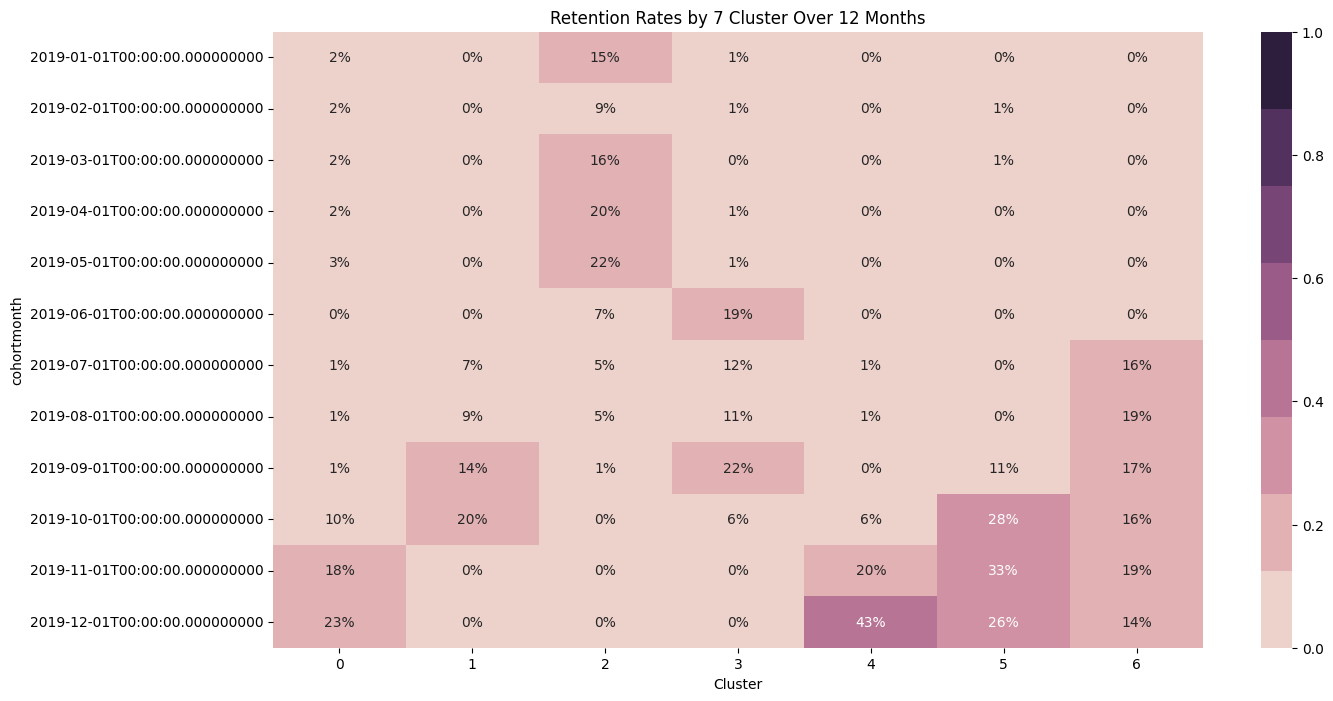

In [ ]:
# Tính retention cho mỗi cụm khách hàng
retention_by_cluster = cohort_df.groupby(['cohortmonth', 'Cluster', 'cohortindex'])['CustomerKey'].nunique().reset_index()

# Tính toán số lượng khách hàng theo từng nhóm cụm
cluster_size = cohort_df.groupby('Cluster')['CustomerKey'].nunique()

# Tính toán retention cho mỗi nhóm cụm
retention_by_cluster['RetentionRate'] = retention_by_cluster.groupby(['Cluster', 'cohortmonth'])['CustomerKey'].apply(lambda x: x / cluster_size[x.name[0]])

# Tạo pivot table cho retention
retention_pivot = retention_by_cluster.pivot_table(index='cohortmonth', columns='Cluster', values='RetentionRate').round(2)

retention_filled = retention_pivot.fillna(0.001)  # Sử dụng 0.001 thay vì 0 để có màu sắc nhỏ hơn 0%

plt.figure(figsize=(15, 8))
plt.title('Retention Rates by 7 Cluster Over 12 Months')
sns.heatmap(data=retention_filled, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap=sns.cubehelix_palette(8))
plt.show()